In [1]:
import numpy as np
from dtw import dtw
from pandas import Series
from pandas import TimeGrouper
from pandas import DataFrame
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 16,4

Populating the interactive namespace from numpy and matplotlib


In [ ]:
series = pd.DataFrame.from_csv('Dataset/databasePreprocessing.csv', header=0)

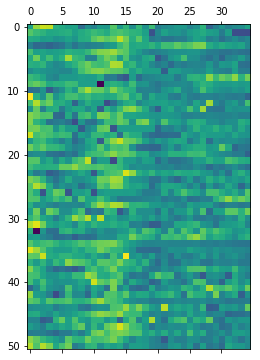

In [3]:
matshow(series.T, interpolation=None, aspect='auto')

In [4]:
def distance(x,y):
    return abs(x-y)

In [ ]:
series.keys()

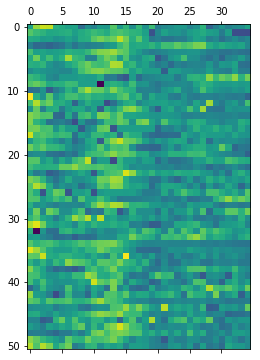

In [6]:
matshow(series.T[:51], interpolation=None, aspect='auto')

In [7]:
%%time
state_list = series.keys()[:51]
dd1 = [ [ (dtw(series[state_list[x]],series[state_list[y]],distance)[0] if y > x else -1)  for y in range(len(state_list)) ] 
       for x in range(len(state_list)) ]
dd2 = [ [ (dd1[x][y] if y > x else dd1[y][x])  for y in range(len(state_list)) ] for x in range(len(state_list)) ]
for i in range(len(state_list)):
    dd2[i][i] = 0.0

Wall time: 4.27 s


In [30]:
dtw??

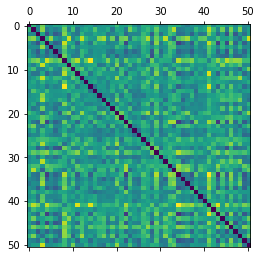

In [8]:
matshow(dd2, interpolation=None, aspect='auto')

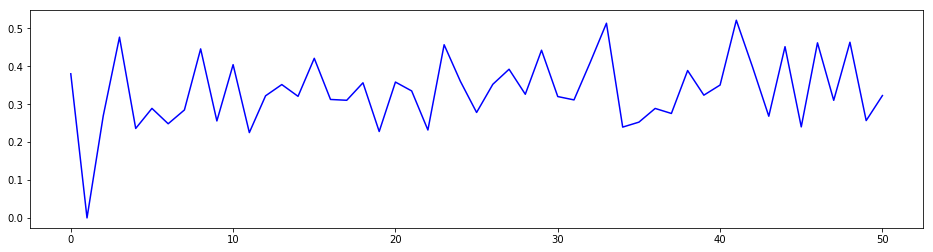

In [15]:
for sims in dd2[1:2]:
    plot(sims,'b-')

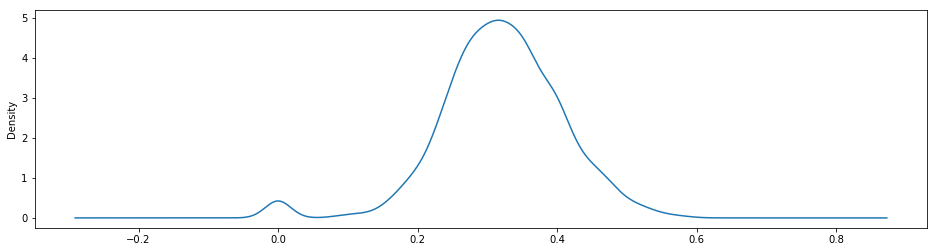

In [10]:
from pandas import Series
Series(reshape(dd2,(1,51*51))[0]).plot(kind='kde')

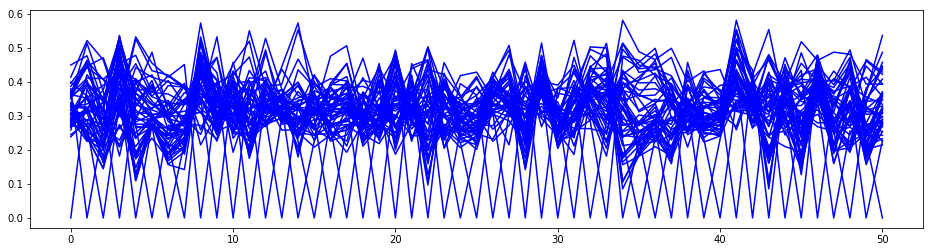

In [10]:
for sims in dd2[:51]:
    plot(sims,'b-')

In [112]:
# density based clustering
print ('dbscan')
eps_list=np.arange(0.1,2.1,0.1)
num_min_samples = [2]
all_noise=[]
all_clusters = []
for j in num_min_samples:
    # differet number of min samples -> j
    clusters_num =[]
    noise = []
    for i in eps_list:
        dbscan = DBSCAN(eps=i, min_samples=j, metric='precomputed')
        dbscan.fit(dd2)

        hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))

        labels = dbscan.labels_
        
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        print('Estimated number of clusters: %d' % n_clusters_)
        dic= dict(zip(bins, hist))
        noise= np.append(noise,([dic[-1]]))
        clusters_num = np.append(clusters_num,([n_clusters_]))
    all_noise = np.append(all_noise,[noise])
    all_clusters = np.append(all_clusters,[clusters_num])

dbscan
Estimated number of clusters: 1
Estimated number of clusters: 2
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1


In [ ]:
print(len(eps_list),len(all_clusters)/len(num_min_samples))
for i in range(len(num_min_samples)):
    min_samples = num_min_samples[i]
    plt.plot(eps_list,all_clusters,label=str(min_samples))
    

plt.legend(title='min_samples')
plt.xlabel('eps value')
plt.xlim(0.1,2.0)
plt.ylabel('Number of Clusters')

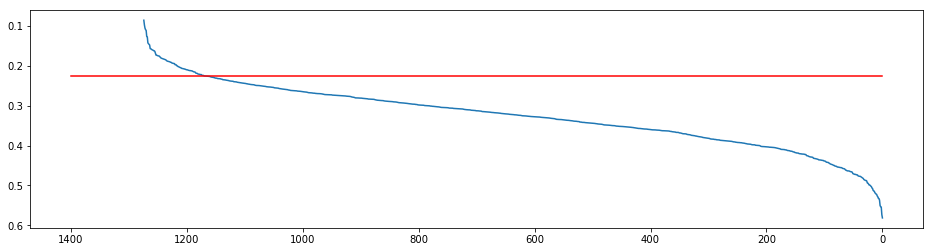

In [32]:
df1 = np.asarray(dd1).reshape(-1)
df1 = sorted(df1, reverse=True)
df1 = [x for x in df1 if x !=-1]
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plot(df1)
plt.plot([0,1400], [0.226,0.226], 'r-')

In [ ]:
from scipy.stats import itemfreq

db = DBSCAN(eps=0.226, min_samples=2, metric='precomputed').fit(dd2)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print itemfreq(db.labels_)
label = db.labels_
from operator import itemgetter
sorted(zip(state_list,db.labels_),key=itemgetter(1))


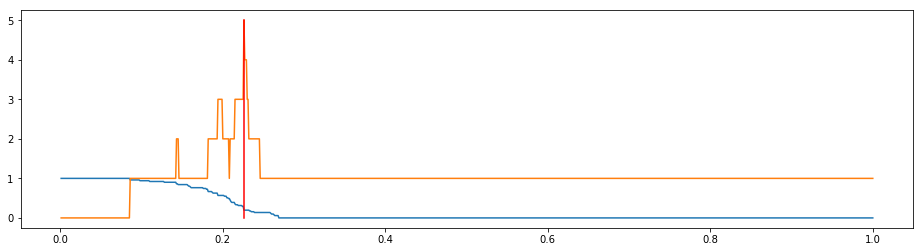

In [34]:
eps_list = linspace(0.001,1.0,num=1000)
noise_list = array([])
n_clusters_list = array([])
for myeps in eps_list:
    db = DBSCAN(myeps, min_samples=2, metric='precomputed').fit(dd2)
    noise_list = append(noise_list, sum([ 1 if i==-1 else 0 for i in db.labels_]))
    n_clusters_list = append(n_clusters_list, len(set(db.labels_)) - (1 if -1 in db.labels_ else 0))
plot(eps_list, noise_list/51)
plot(eps_list, n_clusters_list)
plot([0.226,0.226],[0,5],'r-')

Stress value:  9.4776455297


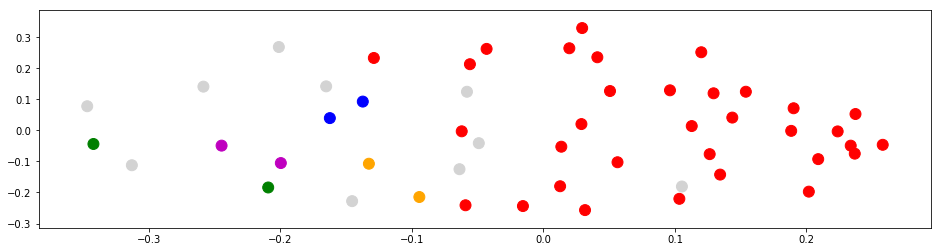

In [35]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dd2)
print "Stress value: ", pos.stress_

# Assign colors based on clusters
db = DBSCAN(eps=0.226, min_samples=2, metric='precomputed').fit(dd2)
cols = ['lightgray', 'red', 'green', 'orange', 'blue', 'm']
cc = [ cols[l+1] for l in db.labels_]
scatter(pos.embedding_.T[0], pos.embedding_.T[1], color=cc, s=120)

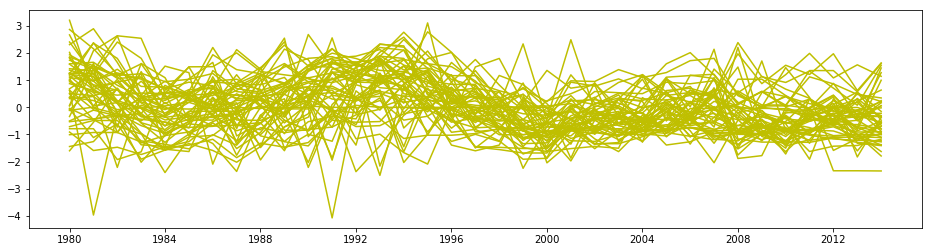

In [36]:
for i in range(len(label)):
    plot(series[state_list[i]],'y-')

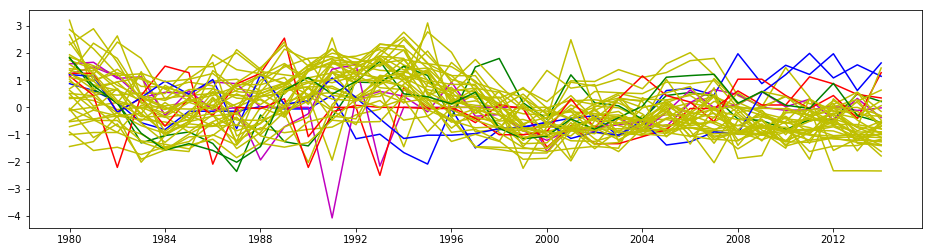

In [37]:
for i in range(len(db.labels_)):
    if db.labels_[i] == 0:
        plot(series[state_list[i]],'y-')
    elif db.labels_[i] == 1:
        plot(series[state_list[i]],'b-')
    elif db.labels_[i] == 2:
        plot(series[state_list[i]],'m-')
    elif db.labels_[i] == 3:
        plot(series[state_list[i]],'g-')
    elif db.labels_[i] == 4:
        plot(series[state_list[i]],'r-')    

In [67]:
df_clusters = series.T
df_clusters['Cluster'] = db.labels_
df_clusters[df_clusters['Cluster']==2]

Year,1980-01-01 00:00:00,1981-01-01 00:00:00,1982-01-01 00:00:00,1983-01-01 00:00:00,1984-01-01 00:00:00,1985-01-01 00:00:00,1986-01-01 00:00:00,1987-01-01 00:00:00,1988-01-01 00:00:00,1989-01-01 00:00:00,...,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,Cluster
Florida,1.218705,1.492947,1.127291,0.353789,0.554197,0.515522,0.933916,0.874145,0.00000,0.000000,...,0.170962,0.659674,0.473330,0.002197,-0.110312,-0.089216,0.030325,-0.113828,-0.018898,2
Kansas,1.605682,1.662399,1.066869,1.123586,-0.294342,0.613132,-0.095832,-0.010757,-1.93914,-0.719721,...,0.641491,-0.010757,0.102678,0.584773,0.017602,0.301188,-0.464494,0.329546,-0.379418,2


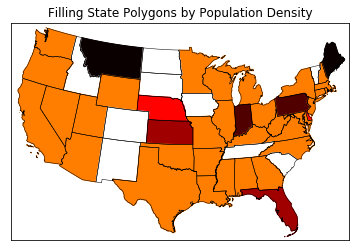

In [56]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = {
'New Jersey':  100.0,
'Rhode Island':   100.0,
'Massachusetts':   100.0,
'Connecticut':    100.0,
'Maryland':  100.0,
'New York':    100.0,
'Delaware':    200.0,
'Florida':     300.0,
'Ohio':  100.0,
'Pennsylvania':  400.0,
'Illinois':    100.0,
'California': 100.0,
'Hawaii':  100.0,
'Virginia':    100.0,
'Michigan':   100.0,
'Indiana':   400.00,
'North Carolina':  100.0,
'Georgia':     100.0,
'Tennessee':   0.0,
'New Hampshire':   100.0,
'South Carolina':  0.0,
'Louisiana':   100.0,
'Kentucky':   100.0,
'Wisconsin':  100.0,
'Washington': 100.0,
'Alabama':     100.0,
'Missouri':    100.0,
'Texas':   100.0,
'West Virginia':   100.0,
'Vermont':    0.0,
'Minnesota':  100.0,
'Mississippi':   100.0,
'Iowa':  0.0,
'Arkansas':    100.0,
'Oklahoma':    100.0,
'Arizona':     100.0,
'Colorado':  0.0,
'Maine':  500.0,
'Oregon':  100.0,
'Kansas':  300.0,
'Utah':  100.0,
'Nebraska':    200.0,
'Nevada':  100.0,
'Idaho':   0.0,
'New Mexico':  0.0,
'South Dakota':  0.0,
'North Dakota':  0.0,
'Montana':     500.0,
'Wyoming':      100.0,
'Alaska':     0.0}
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 500 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Filling State Polygons by Population Density')
plt.show()

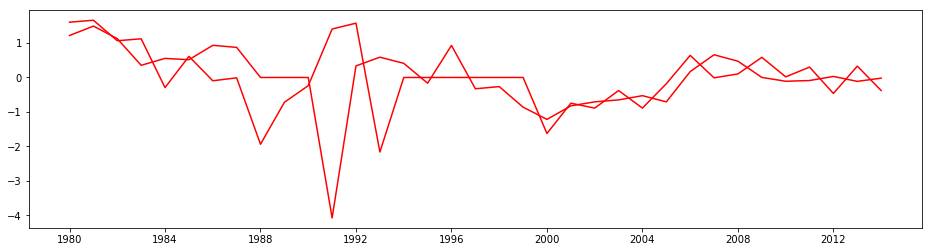

In [72]:
for i in range(len(db.labels_)):
    if db.labels_[i] == 2:
        plot(series[state_list[i]],'r-')
 


In [ ]:
df_clusters = series.T
df_clusters['Cluster'] = db.labels_

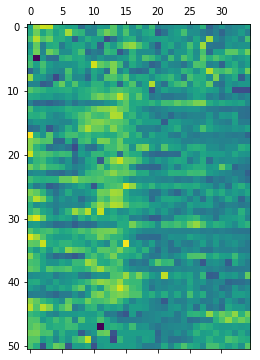

In [153]:
df_sort=sorted(zip(array(series.T[:51]),db.labels_),key=itemgetter(1))
df_sort2=[el[0] for el in df_sort]
matshow(df_sort2, interpolation=None, aspect='auto')

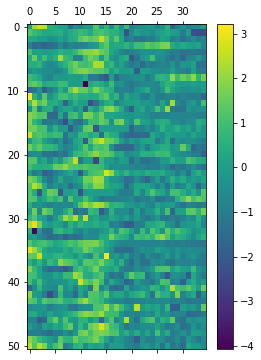

In [197]:
matshow(series.T[:51], interpolation=None, aspect='auto')
plt.colorbar()

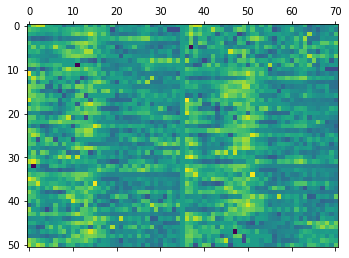

In [155]:
before = series.T[:51]
after = df_sort2
separator = array([[ 0 ] * 51]).T
matshow(hstack((before, separator, after)), interpolation=None, aspect='auto')